In [1]:
import numpy as np
import pandas as pd

In [ ]:
str(-7.0)

In [2]:
prior_all_stats = pd.read_hdf("data/prior_all_stats.h5", "table")

prior_all_stats.drop(['indprod_num_products_dcos_14_reg', 'indprod_num_products_dsin_14_reg',
                      'indprod_num_products_dcos_30_reg', 'indprod_num_products_dsin_30_reg'], axis=1, inplace=True)

prior_all_stats['prediction'] = 0
all_users = prior_all_stats.loc[prior_all_stats.eval_set == "train", "user_id"].unique()
np.random.seed(1234)
np.random.shuffle(all_users)

valid_set = pd.DataFrame({'user_id': all_users, 'validation_set': np.arange(0, all_users.shape[0]) % 11})

prior_all_stats = prior_all_stats.merge(valid_set, on='user_id', how='left')

prior_all_stats.validation_set = prior_all_stats.validation_set.fillna(-1)


In [3]:
prior_all_stats['user_distinct_products_log'] = prior_all_stats.user_distinct_products

In [4]:
for column in prior_all_stats.columns:
    print(column)

user_id
product_id
indprod_dow_sin
indprod_dow_cos
indprod_hod_sin
indprod_hod_cos
indprod_num_products
indprod_num_products_dw_8
indprod_num_products_dw_16
indprod_num_products_dw_32
indprod_num_products_dw_64
indprod_num_products_dw_128
num_products_dcos_14
num_products_dsin_14
num_products_dcos_30
num_products_dsin_30
indprod_num_products_ow_2
indprod_num_products_ow_4
indprod_num_products_ow_8
indprod_num_products_ow_16
indprod_num_products_ow_32
indprod_add_to_cart_order
indprod_add_to_cart_proportion
indprod_inorder_1
indprod_inorder_2
indprod_inorder_3
indprod_days_since_last
indprod_orders_since_last
indprod_proportion_orders
indprod_days_per_order
user_dow_sin
user_dow_cos
user_hod_sin
user_hod_cos
user_num_products
user_mean_products
user_num_days
user_num_orders
user_days_per_order
product_dow_sin
product_dow_cos
product_hod_sin
product_hod_cos
product_num_purchases
product_proportion_orders
product_days_per_order
indprod_num_products_ow_2_reg
indprod_num_products_ow_4_reg
i

In [4]:
logged_columns = [
    'indprod_num_products',
'indprod_num_products_dw_8',
'indprod_num_products_dw_16',
'indprod_num_products_dw_32',
'indprod_num_products_dw_64',
'indprod_num_products_dw_128',
'indprod_num_products_ow_8',
'indprod_num_products_ow_16',
'indprod_num_products_ow_32',
'indprod_num_products_ow_2',
'indprod_num_products_ow_4',
    'user_num_products',
    'user_num_orders',
    'product_num_purchases',
    'user_distinct_products_log'
]

In [5]:
for col in logged_columns:
    prior_all_stats[col] = np.log1p(prior_all_stats[col])

In [6]:
scaled_columns = [
'indprod_num_products',
'indprod_num_products_dw_8',
'indprod_num_products_dw_16',
'indprod_num_products_dw_32',
'indprod_num_products_dw_64',
'indprod_num_products_dw_128',
'num_products_dcos_14',
'num_products_dsin_14',
'num_products_dcos_30',
'num_products_dsin_30',
'indprod_num_products_ow_2',
'indprod_num_products_ow_4',
'indprod_num_products_ow_8',
'indprod_num_products_ow_16',
'indprod_num_products_ow_32',
'indprod_add_to_cart_order',
'indprod_days_since_last',
'indprod_orders_since_last',
'indprod_proportion_orders',
'indprod_days_per_order',
'user_num_products',
'user_mean_products',
'user_num_days',
'user_num_orders',
'user_days_per_order',
'product_num_purchases',
'product_proportion_orders',
'product_days_per_order',
'days_since_prior_order',
'absolute_date',
'max_order_number',
'max_absolute_date',
'reverse_date',
'reverse_order_number',
'indprod_dow_avg_diff',
'indprod_hod_avg_diff',
'user_dow_avg_diff',
'user_hod_avg_diff',
'product_dow_avg_diff',
'productd_hod_avg_diff',
'product_hod_avg_diff',
'user_distinct_products_log'
]

In [7]:
for col in scaled_columns:
    prior_all_stats[col] = (prior_all_stats[col] - prior_all_stats[col].mean()) / prior_all_stats[col].std()

In [8]:
prior_test = prior_all_stats.loc[prior_all_stats.eval_set == "test", :]
prior_train = prior_all_stats.loc[(prior_all_stats.eval_set == "train") & (prior_all_stats.validation_set != 10), :]
prior_valid = prior_all_stats.loc[prior_all_stats.validation_set == 10, :]

X_test = prior_test.drop(['user_distinct_products', 'reverse_date', 'reverse_order_number', "prediction", "eval_set", "validation_set", "order_id", "reordered", "user_id", "product_id",], axis=1).values
X_train = prior_train.drop(['user_distinct_products', 'reverse_date', 'reverse_order_number', "prediction", "eval_set", "validation_set", "order_id", "reordered", "user_id", "product_id"], axis=1).values
X_valid = prior_valid.drop(['user_distinct_products', 'reverse_date', 'reverse_order_number', "prediction", "eval_set", "validation_set", "order_id", "reordered", "user_id", "product_id"], axis=1).values

In [9]:
y_train = prior_train.reordered.values
y_valid = prior_valid.reordered.values

In [11]:
from sklearn.linear_model import SGDClassifier

In [47]:
model = SGDClassifier(loss='log', penalty='none')

In [48]:
%%time
model.fit(X_train, y_train)

CPU times: user 1min 6s, sys: 6.76 s, total: 1min 13s
Wall time: 1min 13s


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='none', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [49]:
model.score(X_valid, y_valid)

0.90877727333178615

In [50]:
prior_all_stats.loc[prior_all_stats.eval_set == "test", 'prediction'] = model.predict_proba(X_test)[:,1]
prior_all_stats.loc[(prior_all_stats.eval_set == "train") & (prior_all_stats.validation_set != 10), 'prediction'] = model.predict_proba(X_train)[:,1]
prior_all_stats.loc[prior_all_stats.validation_set == 10, 'prediction'] = model.predict_proba(X_valid)[:,1]

raw_output = prior_all_stats.loc[:,['prediction', 'eval_set', 'validation_set', 'order_id', 'product_id', 'user_id', 'user_distinct_products', 'reordered']]
raw_output.to_csv("rawpredictions/linearmodel.csv", index=False)


In [82]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.kernel_approximation import Nystroem

rbf_feature = Nystroem(n_components=1000)

In [83]:
rbf_feature.fit(X_train)

Nystroem(coef0=1, degree=3, gamma=None, kernel='rbf', kernel_params=None,
     n_components=1000, random_state=None)

In [76]:
X_train.shape[0]/2000

3853.8515

In [84]:
rbf_model = SGDClassifier(loss='log', warm_start=True, alpha=.00003)

In [85]:
rbf_model

SGDClassifier(alpha=3e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=True)

In [86]:
%%time
n_iter = 1
partitions = 100
rows = X_train.shape[0]
t = 0
for n in range(n_iter):
    order = np.arange(int(partitions)).astype(int)
    np.random.shuffle(order)
    for i in order:
        X_part = X_train[int(rows*i/partitions):int(rows*(i+1)/partitions),:]
        y_part = y_train[int(rows*i/partitions):int(rows*(i+1)/partitions)]
        rbf_model.fit(rbf_feature.transform(X_part), y_part)
        if t % 10 == 0:
            print('epoch:', n, 'part:', t)
        t = t+1


epoch: 0 part: 0
epoch: 0 part: 10
epoch: 0 part: 20
epoch: 0 part: 30
epoch: 0 part: 40
epoch: 0 part: 50
epoch: 0 part: 60
epoch: 0 part: 70
epoch: 0 part: 80
epoch: 0 part: 90
CPU times: user 37min 48s, sys: 1min 7s, total: 38min 56s
Wall time: 9min 28s


In [87]:
rbf_model.coef_.max()

1.7087574596431816

In [69]:
# 2000 with .0001 penalty
score_byparts(X_valid, y_valid)

0.90825569016492869

In [73]:
# 2000 with .00006 penalty
score_byparts(X_valid, y_valid)

0.90807184565844679

In [64]:
# 2000 with .00003 penalty
score_byparts(X_valid, y_valid)

0.90861685517286839

In [50]:
# 1000 with .0001 penalty
score_byparts(X_valid, y_valid)

0.908206139347987

In [88]:
# 1000 with .00003 penalty
score_byparts(X_valid, y_valid)

0.90834044952817206

In [55]:
# 1000 with .00001 penalty
score_byparts(X_valid, y_valid)

0.90843561788830329

In [21]:
def score_byparts(X, y):
    partitions = 100
    rows = X.shape[0]
    scores = []
    for i in range(partitions):
        X_part = X[int(rows*i/partitions):int(rows*(i+1)/partitions),:]
        y_part = y[int(rows*i/partitions):int(rows*(i+1)/partitions)]
        scores.append(rbf_model.score(rbf_feature.transform(X_part), y_part))
        #if i % 10 == 0:
        #    print('part:', i)
    return np.array(scores).mean()

In [20]:
def get_prob_byparts(X):
    partitions = 100
    rows = X.shape[0]
    probs = np.array([])
    for i in range(partitions):
        X_part = X[int(rows*i/partitions):int(rows*(i+1)/partitions),:]
        probs = np.concatenate((probs, rbf_model.predict_proba(rbf_feature.transform(X_part))[:,1]))
        #if i % 2 == 0:
        #    print('part:', i)
    return probs

In [124]:
# with no penalty
score_byparts(X_valid, y_valid)

part: 0
part: 10
part: 20
part: 30
part: 40
part: 50
part: 60
part: 70
part: 80
part: 90


0.90759203454263015

In [22]:
# with .0001 penalty
score_byparts(X_valid, y_valid)

0.90761027829577856

In [37]:
# with .00003 penalty
score_byparts(X_valid, y_valid)

0.90791278557078803

In [27]:
# with .00001 penalty
score_byparts(X_valid, y_valid)

0.90794275060212104

In [31]:
# with .000001 penalty
score_byparts(X_valid, y_valid)

0.87218329997519595

In [ ]:
prior_all_stats.loc[prior_all_stats.eval_set == "test", 'prediction'] = get_prob_byparts(X_test)
prior_all_stats.loc[(prior_all_stats.eval_set == "train") & (prior_all_stats.validation_set != 10), 'prediction'] = get_prob_byparts(X_train)
prior_all_stats.loc[prior_all_stats.validation_set == 10, 'prediction'] = get_prob_byparts(X_valid)

raw_output = prior_all_stats.loc[:,['prediction', 'eval_set', 'validation_set', 'order_id', 'product_id', 'user_id', 'user_distinct_products', 'reordered']]
raw_output.to_csv("rawpredictions/kernelmodel_1.csv", index=False)


part: 0
part: 2
part: 4
part: 6
part: 8
part: 10
part: 12
part: 14
part: 16
part: 18
part: 20
part: 22
part: 24
part: 26
part: 28
part: 30
part: 32
part: 34
part: 36
part: 38
part: 40
part: 42
part: 44
part: 46
part: 48
part: 50
part: 52
part: 54
part: 56
part: 58
part: 60
part: 62
part: 64
part: 66
part: 68
part: 70
part: 72
part: 74
part: 76
part: 78
part: 80
part: 82
part: 84
part: 86
part: 88
part: 90
part: 92
part: 94
part: 96
part: 98
part: 0
part: 2
part: 4
part: 6
part: 8
part: 10
part: 12
part: 14
part: 16
part: 18
part: 20
part: 22
part: 24
part: 26
part: 28
part: 30
part: 32
part: 34
part: 36
part: 38
part: 40
part: 42
part: 44
part: 46
part: 48
part: 50
part: 52
part: 54
part: 56
part: 58
part: 60
part: 62
part: 64
part: 66
part: 68
part: 70
part: 72
part: 74
part: 76
part: 78
part: 80
part: 82
part: 84
part: 86
part: 88
part: 90
part: 92
part: 94
part: 96
part: 98
part: 0
part: 2
part: 4
part: 6
part: 8
part: 10
part: 12
part: 14
part: 16
part: 18
part: 20
part: 22
part: 2

/Users/alex/anaconda/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


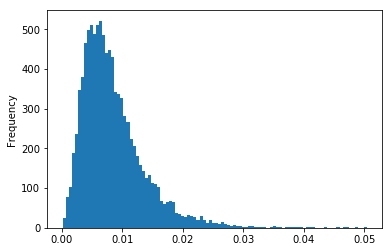

In [70]:
pd.Series(rbf_feature.transform(X_train[88488,:])[0]).plot.hist(bins=100)

In [104]:
rbf_model.coef_.mean()

-0.014189994441569926

In [55]:
%matplotlib inline